### <img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Introducción al Análisis Estadístico con Lenguajes de Programación para Machine Learning (IAELPML). 2023-2024.
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
04 Random Variables
<a class="tocSkip">   
</h1>  

## <span style='background:yellow; color:red'> Remember:<a class="tocSkip"> </span>     

+ Navigate to your `IAELPMML` folder in the console/terminal.  
+ Execute `git pull origin main` to update the code
+ **Do not modify the files in that folder**, copy them elsewhere

In [ ]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

## Discrete Random Variables

### Theoretical Models Vs Empirical Data

+ We begin with a simple mental experiment. Imagine we roll a dice (a honest not-loaded one) a million times and we look at the relative frequencies of every possible result. What is your guess for the numbers in the second row of this table?  
$$
\quad\\
\begin{array}{|c|c|c|c|c|c|c|}
\hline
\text{value} & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline
\text{relative frequency} & ? & ? & ? & ? & ? & ? \\
\hline
\end{array}
\quad\\
$$
Those values that you clearly have in your mind are a **theoretical model** (your *prior*) of the outcome of this experiment. Of course, when we run the experiment and we get **empirical data** we do not expect the results to be a perfect match with the theory, because this is a **random experiment**. 

+ And that is precisely the notion of a discrete random variable $X$: *a theoretical model for the outcome of a random experiment with a finite number of possible outcomes.* More precisely (from the mathematical point of view) the result of the experiment is a discrete/countable set.

+ Therefore, in order to describe a discrete random variable $X$ we need to provide its **probability density table or function**. That is a table of all the possible values of $X$ and their corresponding probabilities:
$$
\quad\\
\begin{array}{|c|c|c|c|c|c|c|}
\hline
\text{value of }X: & x_1 & x_2 & \cdots & x_k \\
\hline
\text{Probability for that value: }P(X = x_i) & p_1 & p_2 & \cdots & p_k \\
\hline
\end{array}
\quad\\
$$
where $p_1 + p_2 + \cdots + p_k = 1$. Sometimes we will use *function notation* $f(x_i) = P(X = x_i)$, specially when we want to give a *formula* for the probability. We will soon see examples. 

+ The probability density function is sometimes called *probability mass function*. Thus you may see it abreviated to pdf or pmf, depending on the authors. For example, SciPy uses `pmf`.


+ **Exercise:** use NumPy to do the experiment with a million dice rolls and get their absolute and relative frequency table.  

In [ ]:
# %load "./exclude/ejercicios/S04-001.py"

### Mean and Variance for a Discrete Random Variable

+ A discrete random variable $X$ is therefore a theoretical model for the distribution of values of a random variable in a population. The **population mean** or **expectation** of $X$ represents the mean or average of the values that $X$ takes *in the population*. It is denoted with the greek letter $\mu$ and also wit the symbol $E(X)$. When we need to clarify the random variable involved we will sometimes use a symbol such as $\mu_X$.

+ Similarly we define the **population variance** $\sigma^2$, using all the values in the population. Both $\mu$ and $\sigma^2$ should be considered as abstract or also *hidden* values that we want to *estimate*, getting approximate values, but we can not actually obtain with certainty.

+ One of the main goals of Statistics is to use sample data to estimate parameters of a population. Suppose that the discrete variable $X$ takes $n$ different values $x_1, x_2,\ldots, x_k$. If we have a sample of $X$ and the absolute frequencies **in that sample** are $f_1, f_2, \ldots,f_k$, then we can use that sample to give an estimate of the *population mean* $\mu$ using the *sample mean*: 
$$
\quad\\
\bar X = \dfrac{x_1 f_1 + \cdots + x_k f_k}{n} = x_1 fr_1 + \cdots + x_k fr_k
\quad\\
$$  
  where $fr_1, \ldots, fr_k$ are the *sample relative frequencies*. It is very important that you realize that $\bar X$ is an empirical quantity that comes out of a sample. Therefore it is something that we can compute using that sample that we have. On the other hand $\mu$ is a theoretical quantity because it belongs to the population and we do not have access to the population (we would not be needing Statistic if we did!).

+ Now, looking at the last formula, recall that the relative frequencies are closely related with probabilities. In fact, the idea of probability first appeared as a theoretical model of the relative frequency. And so if we want to give a theoretical definition of the mean or expectation of a discrete random variable the only sensible choice is this:

**Mean of a Discrete Random Variable** $X$
$$
\mu = E(X) = x_1 p_1 + \cdots + x_k p_k = \sum_{i = 1}^k \,x_i p_i
$$

That is, we have simply replaced relative frequencies with probabilities to go from empirical to theoretical. A similar reasoning lead to this expression for the:

**Variance of a Discrete Random Variable** $X$
$$
\sigma^2 = \operatorname{Var}(X) = 
(x_1 - \mu)^2 p_1 + \cdots + (x_k - \mu)^2 p_k = \sum_{i = 1}^k \,(x_i -\mu)^2 p_i
$$


  The positive square root $\sigma$ of the variance is called the **standard deviation** of $X$.

**Exercise:** use Python (with NumPy or pandas) to compute $\mu$ and $\sigma^2$ for the random variable $X$ representing the outcome of a honest dice. 

In [ ]:
# %load "./exclude/ejercicios/S04-002.py"

### Sampling Discrete Random Variables with Python


+ Suppose we have a discrete random variable $X$ with values $x_1, \ldots, x_k$ and corresponding probabilities $p_1, \ldots, p_k$. In order to run simulations of our experiments with $X$ we would like to be able to use Python to generate synthetic random samples of $X$, according to its probability distribution. We can do that with this code

In [ ]:
print("First we roll a honest dice")
values_X = np.arange(1, 7)
probs_X = np.ones(shape = 6) / 6
print(probs_X)
print(np.random.choice(values_X, 10, p=probs_X))

print("Now let us load the dice giving the six a higher probability")
probs_X_2 = probs_X.copy()
probs_X_2[5] = 3
probs_X_2 = probs_X_2 / probs_X_2.sum()
print(probs_X_2)
print(np.random.choice(values_X, 10, p=probs_X_2))

First we roll a honest dice
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[6 4 5 1 6 2 2 5 3 1]
Now let us load the dice giving the six a higher probability
[0.04347826 0.04347826 0.04347826 0.04347826 0.04347826 0.7826087 ]
[1 6 6 6 6 4 6 5 6 6]


### Operations on Discrete Random Variables

+ **Example:** Assume that the population of interest is the set of households in a given city. And let the random variable $X$ represent the annual home insurance paid by each household. Similarly, let $Y$ represent the annual life insurance for each household. When we want to obtain the total amount of both insurance payments combined we need to consider the sum of the random variables $X + Y$. In many examples like this we would like to use the information about $X$ and $Y$ to obtain the properties of their sum $X + Y$ without having to redo the calculation. 

+ More generally, we are often interested in *linear combinations* of random variables, such as 
$$
\quad\\
a\,X + b\,Y,\qquad\text{ where }a\text{ and }b\text{ are numeric coefficients.}
\quad\\
$$

+ The mean or expectation of such a linear combination is simply the same linear combination of the expectations  of the individual variables:
$$
\quad\\
E(a\,X + b\,Y) = a\,E(X) + b\,E(Y)
\quad\\
$$

+ For the variance things get a little more complicated, because we need the notion of independence. Informally, $X$ and $Y$ are independent if knowledge about the value of $X$ does not affect the probability of the values of $Y$. The **covariance** of $X$ and $Y$ is
$$
\quad\\
\operatorname{cov}(X, Y) = E((X - \mu_X)(Y - \mu_Y))
\quad\\
$$
and the most general result says that
$$
\quad\\
\sigma^2(a\,X + b\, Y) = a^2\,\sigma^2_X + b^2\,\sigma^2_Y + 2\,a\,b\, \operatorname{cov}(X, Y)
\quad\\
$$
+ When $X$ and $Y$ are independent it turns out that $\operatorname{cov}(X, Y) = 0$ (creful, it does not work the other way round) and therefore **in the independence case** we get a simpler formula:
$$
\quad\\
\sigma^2(a\,X + b\, Y) = a^2\,\sigma^2_X + b^2\,\sigma^2_Y
\quad\\
$$



### The Distribution Function

+ The **(cumulative) distribution function (cdf)** $F_X$ of a random variable $X$ (discrete or continuous) is defined by:
$$
\quad\\
F_X(k) = P(X\leq k)\qquad\text{ for any number }k
\quad\\
$$
You may think of $F(k)$ as the theoretical version of the table of cumulative relative frequencies. Therefore, it answers the question "*what is the probability that $X$ takes a value $\leq k$?*"

+ Because they are probabilities and because of their cumulative nature the typical graph for the distribution function of a discrete variable is a **stair shaped** graph like this one, climbing from 0 to 1 with a jump at each value of $X$ equal to the probability of that value:
![](fig/04-01-FuncionDistribucionVariableAleatoria.png)

## Binomial Variables

### Bernouilli Random Variables

+ A Bernouilli random variable is a very simple discrete random variable that only takes two values, 0 and 1, with the following probability table:
$$
\quad\\
\begin{array}{|l|c|c|}
    \hline
    \rule{0cm}{0.5cm}\text{Value of }X:&1&0\\
    \hline
    \rule{0cm}{0.5cm}\text{Probability for that value:}& p & q = 1 - p\\
    \hline
\end{array}
\quad\\
$$
These values 1 and 0 are (arbitrarily) called *success* and *failure* respectively.

+ These Bernouilli type variables are useful because they are the building blocks for more complex types of variables, as we will soon see.

+ **Example:** the variable $X = $ "number of appearances of six when rolling a single dice" is a Bernouilli variable with $p = 1/6$ and $q = 5/6$. We denote this with $X\sim Bernouilli(p)$ (the symbol $\sim$ is read "is of type ...")

+ The mean of a random variable $X\sim Bernouilli(p)$ is $\mu = p$, and its variance is $\sigma^2 = p\cdot q = p(1 - p)$.


### Binomial Random Variables

+ **Example:** Suppose that we roll a dice 11 times and we use that experiment (the whole set of 11 rolls of the dice) to define a random variable $X$ where:
$$
\quad\\
X = \textit{number of appearances of 6 in those 11 rolls of the dice}
\quad\\
$$

+ The situation in this example has these characteristics:

  $(1)$ There is a **basic experiment**, rolling a dice in this case, that gets **repeated $n$ times** (in the example $n = 11$).  
  
  $(2)$  The $n$ repeated basic experiments are **independent** of each other. That is, the outcome of one of the experiments is not affected in any way by the outcome of the others.
  
  $(3)$  Every individual instance or trial of the basic experiment can only result in **success** (in the example, rolling a 6) represented with value $1$; o in **failure** (not rolling a 6) represented with value 0.  
  
  $(4)$  The **probability of success** for every trial is $p$ and that for failure is therefore $q = 1- p$. In the example $p = 1/6, q= 5/6$.  
  
  $(5)$ Finally, **our variable $X$ is the number of successful trials (with outcome 1) in the whole set of $n$ independent trials**.

+ **Definition of Binomial Variable**  
  A discrete random variable  $X$ with the above characteristics is a binomial variable with parameters $n$ and $p$, and we will use the symbol $X \sim B(n, p)$ to denote this. 

### Experiments with Binomial Variables using Python

+ Let us see an example of a binomial variable. We will use the `prevalentHyp` variable in the `framingham` table that we have used in previous sessions. The variable takes the value 1 if the patient is hypertensive and 0 otherwise. Keep in mind that 1 and 0 are arbitrary, and so in this example *success* actually means that the patient is in fact hypertensive. 

+ **Exercise:**  
    (a) Load the data table into the `framingham` pandas DataFrame. You have done this before.  
    (b) Find the probability that a randomly chosen patient is hypertensive, and call it $p$.  
    (c) Instead of choosing a single patient, suppose that we choose seven patients at random and with replacement. Let $X$ denote the number of hypertensive patients among those seven. What values can this variable $X$ actually take?  
    (d) Use Python to choose a sample of seven patients (with replacement) and count the number of hypertensive patients in that sample.  
    (e) Iterate the previous step $N = 50000$ times and store the 50000 results in a NumPy array called `X_samples`. Get a relative frequency table of the different values in `X_samples.`  
(f) Choose the right plot to illustrate the contents of `X_samples`.

In [ ]:
# %load "./exclude/ejercicios/S04-003.py"

### Probability Density for Binomial Variables

+ The table of relative frequencies that you obtained in the previous exercise is an empirical approximation of the following expression for the following:

**Theoretical probability density of a binomial variable  $X\sim B(n, p)$**
$$
P(X = k) =\displaystyle\binom{n}{k}\,p^k\,q^{(n -k)}\quad\text{ for }\quad k = 0, 1, 2, \ldots, n
$$
where we recall $q = 1 - p$. Also the definition of the *binomial coefficient* is:
$$
\dbinom{n}{k} = \frac{\overbrace{n\left( n-1\right) \left( n-2\right) \cdots \left( n-k+1\right) }^{k\text{ factors}}}{k!}
$$
where $k! = k\cdot(k - 1)\cdot(k - 2)\cdot\,\cdots\,\cdot 2\cdot 1$ is the factorial of $k$.

+ Luckily you will not have to compute these by hand, Python will do the hard work for us. And it also gives us the chance to see how *painful* these binomial coefficients turn out to be. 

+ Let us use SciPy to obtain $\dbinom{1000}{20}$. Note that these are not unreasonably large numbers, and yet:

In [ ]:
from scipy import special
N = 100
k = 20
special.comb(N, k, exact=True)

535983370403809682970

+ This kind of result illustrates the fact that we should give up any hope of using the binomial distribution *by hand*. 

### Mean and Variance of a Binomial Random Variable

+ If $X \sim B(n, p)$ then:
$$
\quad\\
\fbox{
$\begin{cases}
\mu = n\cdot p\\[3mm]
\sigma^2 = n\cdot p\cdot q
\end{cases}$}
\quad\\
$$
Both results are very easy consequences of the fact that a $B(n, p)$ binomial is the sum of $n$ independent Bernouilli trials with the same $p$.

### The binomial in Python

+ For further details please check the [SciPy documentation website](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

+ To compute concrete probability values of a binomial variable we use it *probability mass function (pmf)*, which is a fancy name for the table of probabilities.

+ **Example:** Let $X\sim B(7, 1/4)$ and let us compute the probability $P(X = 3)$.

In [35]:
from scipy import stats
n = 7
p = 0.25
k = 3
stats.binom.pmf(k, n, p)

0.17303466796875

+ We can also *freeze* the binomial variable and use the frozen version to compute this value but also the mean or variance:

In [36]:
X = stats.binom(n, p)

print("Probability for k = ", k, "is", X.pmf(k))

X_mean = X.mean()
X_var = X.var()

print("X_mean =", X_mean)
print("X_var =", X_var)

Probability for k =  3 is 0.17303466796875
X_mean = 1.75
X_var = 1.3125


+ To plot the probability mass of the distribution we often use a variant of the bar plot called a *stem and leaf* plot:

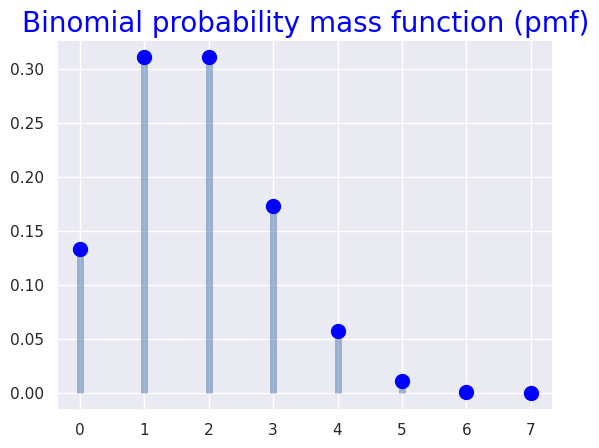

In [37]:
fig, ax = plt.subplots(1, 1)
# First we create arrays with all posible values for this variable...
x = np.arange(start = 0, stop = n + 1, step = 1)
# ... and their probabilities:
probs_x = stats.binom.pmf(x, n, p)
# The next comand plots the "leaf" part
ax.vlines(x, ymin = 0, ymax = probs_x, colors='b', lw=5, alpha=0.5)
# And this one plots the "stem"
ax.plot(x, probs_x, linestyle = '', marker = 'o', color ='blue', markersize=10)
getPlot = ax.set_title("Binomial probability mass function (pmf)", fontsize=20, color="blue")

+ The cumulative distribution function (cdf) is similarly plotted with:

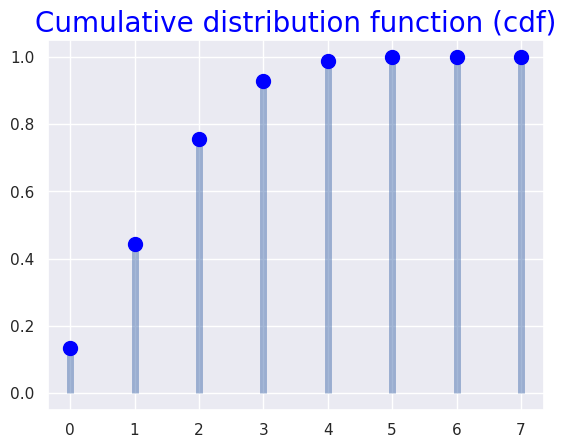

In [38]:
fig, ax = plt.subplots(1, 1)
x = np.arange(start = 0, stop = n + 1, step = 1)
# We replace probabilities with cumulative probabilities
cumul_probs_x = stats.binom.cdf(x, n, p)
ax.vlines(x, ymin = 0, ymax = cumul_probs_x, colors='b', lw=5, alpha=0.5)
ax.plot(x, cumul_probs_x, linestyle = '', marker = 'o', color ='blue', markersize=10)
getPlot = ax.set_title("Cumulative distribution function (cdf)", fontsize=20, color="blue")

+ **Random values from a binomial variable:** To generate random values of a binomial variable we will use either one of this methods:

    + The NumPy classical method with `np.random.binomial(n, p, size)` (set the random seed with `np.random.seed(2022)`)
    + The NumPy modern version with something like `np.random.default_rng(2022).binomial(n, p, size = 10)`.
    + The Scipy version with 

In [39]:
# Recall parameters
print("Binomial B(n, p) with n =", n, ", p = ", p)
# NumPy legacy code
np.random.seed(2022)
print("Numpy legacy \n") 
print(np.random.binomial(n, p, size = 30))
print("--" * 12, "\n")
# NumPy current version
print("Numpy current version \n") 
print(np.random.default_rng(2022).binomial(n, p, size = 30))
print("--" * 12, "\n")
# Scipy
print("SciPy \n") 
print(stats.binom(n, p).rvs(size = 30))

Binomial B(n, p) with n = 7 , p =  0.25
Numpy legacy 

[0 2 0 0 2 2 3 2 3 2 3 3 3 4 1 2 1 2 4 0 2 1 1 2 0 2 3 1 1 2]
------------------------ 

Numpy current version 

[1 0 2 0 2 2 0 0 1 5 4 1 2 1 1 3 4 2 3 5 1 0 4 2 1 0 1 0 0 1]
------------------------ 

SciPy 

[2 1 4 0 3 1 2 3 1 4 0 0 1 1 2 2 2 2 0 3 0 3 0 1 1 1 4 0 1 3]


+ **Note about reproducibility:** If you run the previous cell multiple times you will notice that the SciPy results do not change. That is because SciPy is also affected by the NumPy random seed. However if you remove the seed from the `default_rng` you will notice that ironically the current version of NumPy is not affected by the legacy NumPy random seed generator. 

+ **Exercise:**    
    (a) use Python to get the theoretical probabilities for the binomial variable of the preceding exercise. Recall that $X$ = number of hypertensive patients in a sample (with replacement) of seven patients from the framingham data set.  
    (b) Compare the theoretical values with the relative frequencies that you obtained in that exercise for $N = 50000$ samples of size 7.

In [40]:
# %load "./exclude/ejercicios/S04-004.py"

### The Binomial Zoo

+ There are infinitely many types of binomials, depending on the combination of values for $n$ and $p$. But we can single out three particular cases, each of them requiring a different approach.

#### Binomials with small $n$

+ For example, the $X\sim B(7, 1/4)$ that we have been using in the previous examples. Let us plot its probability distribution again, but this time we add a bar plot to the stem and leaf plot, to ease the comparison between the global shape of this binomial and the ones we will see below. The best way to work with a binomial like this is to use directly the pmf and cdf functions to get the probability values. 

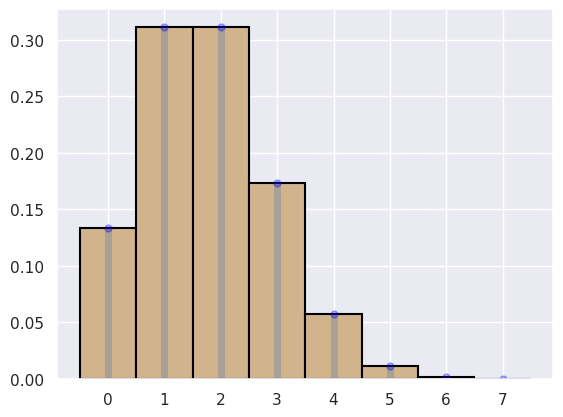

In [41]:
fig, ax = plt.subplots(1, 1)
n = 7
p = 0.25
# First we create arrays with all posible values for this variable...
x = np.arange(start = 0, stop = n + 1, step = 1)
# ... and their probabilities:
probs_x = stats.binom.pmf(x, n, p)
# The next comand plots the "leaf" part
ax.vlines(x, ymin = 0, ymax = probs_x, colors='b', lw=5, alpha=0.3)
ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
# And this one plots the "stem"
getPlot = ax.plot(x, probs_x, linestyle = '', marker = 'o', color ='blue', markersize=5, alpha=0.3)

#### Binomials with large $n$ but $p$ very small (close to $0$) or big (close to $1$).

+ In this case instead of using the binomial it is best to use the approximation provided by the **Poisson distribution**. We will talk about it later. Here we just plot an example with $n = 200$ but $p = 0.001$. *Please note that to improve the visualization we have reduced the range of the x axis to $[0, 50]$ instead of the the actual set of values of $X$ which is $[0, 200]$*. But the probabilities for larger values of $X$ are negligible.

(0.0, 50.0)

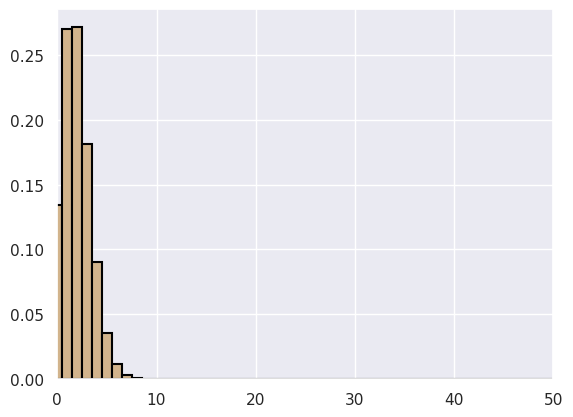

In [42]:
fig, ax = plt.subplots(1, 1)
n = 200
p = 0.01
x = np.arange(start = 0, stop = n + 1, step = 1)
probs_x = stats.binom.pmf(x, n, p)
getPlot = ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
plt.xlim(left=0, right=50)


#### Binomials with large $n$ but moderate $p$

+ By this we mean that $n$ is hundreds or more, while $p$ is an intermediate probability, not too close to 0 or 1. Let us plot the example where $n= 100$ while $p = 1/3$

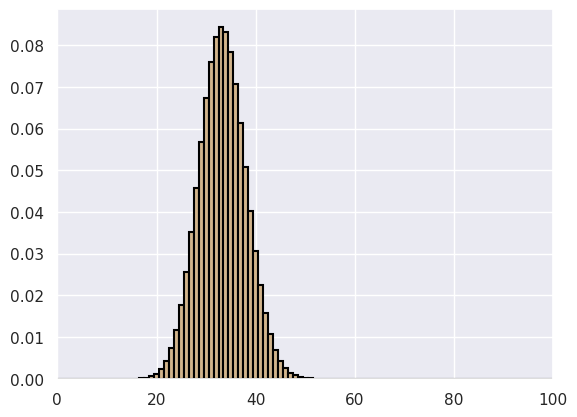

In [43]:
fig, ax = plt.subplots(1, 1)
n = 100
p = 1/3
x = np.arange(start = 0, stop = n + 1, step = 1)
probs_x = stats.binom.pmf(x, n, p)
ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
getPlot = plt.xlim(left=0, right=100)

+ The bar plot is starting to look like a bell shaped curve. That, as you have probably already guessed, is not a coincidence. **Abraham De Moivre** showed that as $n$ gets bigger (keeping $p$ moderate) this plot resembles more and more a normal curve, with  
$$\mu = n\cdot p, \sigma = \sqrt{n\cdot p\cdot q}$$
as was to be expected.
+ This was a very important result at that time, because working directly with these kind of binomials proved to be impossible. For example, if $X\sim B(100, 1/3)$ to compute the probability of the interval 
$$
\quad\\
P(25 \leq X \leq 35) = P(X = 25) + P(X = 26) + \cdots + P(X = 34) + P(X= 35)
\quad\\
$$
you need to compute quite a few terms like this one:
$$
\quad\\
P(X = 29) = \dbinom{100}{29}\left(\dfrac{1}{3}\right)^{29}\left(\dfrac{2}{3}\right)^{71}
\quad\\
$$
and in particular you will have to find out that
$$
\binom{100}{29} = \dfrac{100!}{29!\,\, 71!} = 
\dfrac{100\cdot 99 \cdot 98\cdots 73 \cdot 72}{29\cdot 28 \cdot 27\cdots  2\cdot 1} = 1917353200780443050763600
$$
+ Doing computations like that, particularly when they had to be done by hand, rendered the binomial useless. But the probability we are trying to compute is simply the area of the blue colored region in this plot:

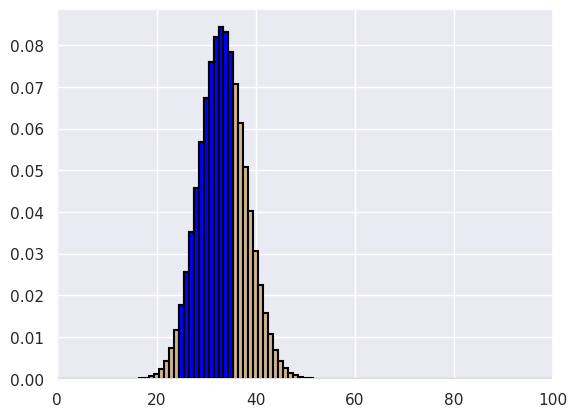

In [44]:
fig, ax = plt.subplots(1, 1)
n = 100
p = 1/3
x = np.arange(start = 0, stop = n + 1, step = 1)
probs_x = stats.binom.pmf(x, n, p)
ax.bar(x, height = probs_x, color='tan', width = 1, lw=1.5, edgecolor='black',linestyle="-")
x1 = np.arange(start = 25, stop = 35 + 1, step = 1)
probs_x1 = stats.binom.pmf(x1, n, p)
ax.bar(x1, height = probs_x1, color='blue', width = 1, lw=1.5, edgecolor='black',linestyle="-")
getPlot = plt.xlim(left=0, right=100)

+ But in problems like this, and as $n$ gets bigger, the difference between the individual bars in this plot becomes less and less relevant. That is way we are more and **more interested in intervals than we are in individual values**. The probability of an individual value is tending to zero as $n$ increases. This is another instance of the transition from discrete to continuous. And when we look at this plot from that perspective, the answer is that we are trying to obtain the blue area under the normal curve. We can do that using **integral calculus**, which had just been discovered when de Moivre worked on this problem. The figure below illustrates this for a different binomial variable:

![](./fig/04-04-BinomialVsNormal.png)

+ Using integrals may seem at first like a complicated way to work. But if you compare it with the computation of binomial coefficients, it turns out to be a very useful simplification. The most important consequence of this, regardless of the technical details, is that this example led people to discover that they could define probability as the area under a curve. And that is the idea behind the definition of a continuous random variable. And this way of assigning probability takes us away from the Laplace Method and into a more abstract and mature concept of Probability.

In [57]:
from IPython.display import IFrame
IFrame("https://www.geogebra.org/m/q4buqzfp",800,800)

## Continuous Random Variables

+ Let us look into that idea of using the area under the graph of a function to assign probabilities. Not every function will do for this, but the requirements are quite simple.

+ A **(continuous) density function** has two properties:
    + It is **non-negative:** $f(x)\geq 0$ for all $x$.
    + The **total area under $f(x)$ is 1**. That is:
   
    $$
    \quad\\
    \int_{-\infty}^{\infty}f(x)\,dx=1
    \quad\\
    $$
    In particular $f$ must be integrable, but we will not look into the technical meaning of that condition.

+ Given a continuous density function we can use it to define a **continuous random variable $X$**, by saying that the probability of $X$ taking value in an interval $[a, b]$ is:
$$
\quad
P(a \leq X \leq b) = \text{area under the graph of }f = \int_a^bf(x)\,dx.
\quad
$$



### Understanding the role of the density function

+ The figure below shows a typical continuous density function and the way to interpret its values.

![](../IAELPML/fig/04-05-InterpretacionFuncionDensidadFicticia.png)

That is why we say that a density function defines a distribution (a way to allocate) probability. In the case of a discrete random variable the table of values vs probabilities does the same job. But now we have a function $f$ to assign probabilities. The function is a *continuous table* of sorts. And if the probability table of a discrete random variable is the theoretical version of the table of relative frequencies, you may now think of this continuous density function as the theoretical version of the density curves that we plotted when exploring the data in a sample.

+ It is very important to keep in mind that **the height of the density function is not the probability. Probability is given by the area under the curve.** They are connected, but different entities.

+ In particular, and this may seem paradoxical at first, the probability value of a single point in a continuous random variable is always zero:
$$
\quad\\
P(X = x_0) = 0,\,\text{ for any value }\,x_0
\quad\\
$$
It is the probability of intervals (not points) what matters here.

### Mean and Variance for a Continuous Random Variable

+ Recall that for a discrete random variable with values $x_1,\ldots, x_k$ and probabilities $p_1, \ldots, p_k$ we had:
$$
\begin{array}{l}
\mu = E(X) = \displaystyle\sum_{i = 1}^k x_i\cdot p_i\\[3mm]
\sigma^2 = Var(X) = \displaystyle\sum_{i = 1}^k (x_i - \mu)^2\cdot p_i
\end{array}
$$
In the case of a continuous random variable $X$ with density function $f(x)$ we have
$$
\quad\\
\begin{array}{l}
\mu = E(X) = \displaystyle\int_{-\infty}^{\infty} x\cdot f(x)\, dx\\[5mm]
\sigma^2 = Var(X) = \displaystyle\int_{-\infty}^{\infty} (x - \mu)^2\cdot f(x)\, dx
\end{array}
\quad\\
$$

Note that going from discrete to continuous is achieved by changing the sum for an integral and the probability $p_i$ for the *probability differential* $dp = f(x)\, dx$, which represents the probability of and *infinitesimally small interval*.



### The (Cumulative) Distribution Function of a Continuous Random Variable

+ The distribution function for a random variable (discrete or continuous) is:
$$
\quad\\
F(k) = P(X \leq k)
\quad\\
$$
and for a continuous random variable that turns out to be
$$
\quad\\
F(k) = \int_{-\infty}^{k}f(x)\,dx
\quad\\
$$

+ For discrete random variables the distribution function looked like a stair. In the continuous case it is more like a ramp, climbing from 0 to 1 as $x$ moves left to right along the horizontal axis:
![](./fig/04-06-FuncionDistribucionVariableContinuaTipica.png)
Note that (unlike the density function) the values of the function are indeed probabilities (cumulative ones, of course). That is one of the reasons that make distribution functions useful:
$$
\quad\\
P(a < X < b) = F(b) - F(a)
\quad\\
$$


## The Uniform Distribution

+ This is possibly the simplest of all continuous random variables, yet it is extremely important and useful. It represents the idea of randomly picking a point in interval $[a, b]$ in such a way that all regions of the interval with the same size are equally probable.  
(*Side Note:* sometimes people say "all points are equally likely" to describe the uniform distribution. But that is misleading because the probability of a single point is always zero in a continuous random variable, be it *uniform or not*).

+ The density function of a uniform variable $X$ is therefore constant in the interval $[a, b]$ and zero elsewhere:
$$
\quad\\
f(x) = 
\begin{cases}
\dfrac{1}{b - a} & \text{ if } a\leq x\leq b\\[3mm]
0 & \text{ otherwise }\\
\end{cases}
\quad\\
$$


### Mean and Variance for Uniform Distributions

+ The mean of a uniform variable is, as expected:
$$
\quad\\
\mu = \dfrac{a + b}{2}
\quad\\
$$
and the variance is
$$
\quad\\
\sigma^2 = \dfrac{(b - a)^2}{12}
\quad\\
$$


### Uniform Distributions with Python

+ The most important operation with random uniform variables in Python is the ability to generate random values. We can do that with NumPy or SciPy as follows:

In [67]:
# Let us generate an array with N random points in [a, b]
N = 20000
a = -5
b = 12

# With current NumPy version 
# See https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html

print("NumPy current version:")
X = np.random.default_rng(2022).uniform(low = a, high = b, size = N)
print(X[0:20])
print("-" * 80, "\n")


NumPy current version:
[-0.79375692 -3.41916895  5.39997734 -3.96874475  6.23756828  7.83768222
 -3.11522868 -4.26805065  2.04509706 11.80669735 11.47637772 -0.63148396
  4.49895585 -0.8800844   0.47434495 10.15311575 11.08393228  7.28316833
 10.7840643  11.93347921]
-------------------------------------------------------------------------------- 



In [ ]:



# With legacy NumPy versions
# See https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

print("NumPy legacy:")
np.random.seed(2022)
X =  np.random.uniform(low = a, high = b, size = N)
print(X[0:20])
print("-" * 80, "\n")

# Scipy
print("SciPy:")
X = stats.uniform(loc = a, scale = b - a).rvs(size = N)
print(X[0:20])


+ Recall that the *size* parameter of NumPy random generators is in fact a *shape*. That is, you can easily modify the above code to get a matrix of uniform random numbers with any desired shape.

+ **Exercise:**  
(a) Using the above results check the formulas for the mean and variance of the uniform distribution.  
(b) Generate a hundred million points uniformly distributed in the square $[-1, 1]\times[-1, 1]$. Count how many of them are at a distance less 
than 1 from the origin.  
(c) Plot the first $n = 5000$ points and those among them that verify the condition about the distance.  
(d) Use your results to estimate the number $\pi$.

In [65]:
# %load "./exclude/ejercicios/S04-005.py"

N=1000

rng = np.random.default_rng(seed=0)
x, y = rng.uniform(low=-1, high=1,size=(2,N))

distance = x + y
num_of_points_in_circle = np.asarray(distance<=1).sum()

print(f"The total number of points is: {N}")
print(f"The number of points that are at a distance <=1 from the origin is: {num_of_points_in_circle}")


#sns.scatterplot(x=x, y=y)


The total number of points is: 1000
The number of points that are at a distance <=1 from the origin is: 868


## Normal Random Variables

### The Normal Curves

+ We have already met these curves more than once. There is in fact a whole [family of normal curves](https://www.geogebra.org/m/BE4aF2Yb), depending on their mean and variance, whose equation is
$$
f_{\mu,\sigma}(x)=\displaystyle\dfrac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$
But fear not, we will not be using that much!

+ The choice of $\mu$ and $\sigma$ determines the shape of this bell curves. More specifically, $\mu$ sets the *center* of the curve (which is always symmetrical), while $\sigma$ controls if the bell is tall and narrow (for small $\sigma$) or short and wide (for bigger $\sigma$). 
![](./fig/04-07-CurvasNormalesZoo.png)

### Normal Random Variables

+ A continuous random variable $X$ whose density curve is $f_{\mu,\sigma}(x)$ is a **normal random variable** and we write $X\sim N(\mu, \sigma)$ to denote a random variable with mean $\mu$ and standard deviation $\sigma$.  
 **Note:** be careful, many authors use $N(\mu, \sigma^2)$ instead. Check always the convention being used. 

In [48]:
#from IPython.display import IFrame
#IFrame("https://www.geogebra.org/m/egtwaagt",800,800)

### Direct Probability Problems for Normal Variables with Python: Tails and Intervals

+ The first skill that we require is the ability to compute the probability of a given interval. That is, given $X\sim N(\mu, \sigma)$ we want to obtain 
$$P(a < X < b)$$
for any choice of $a$ and $b$. In particular we would also like to compute the probability of a **left tail**
$$P(X < b)$$
or a **right tail**
$$P(a < X)$$

+ **Example:** Given $X\sim N(10, 2)$ let us compute the probability of the left tail 
$$P(X < 10.5)$$
If you recall how we used Scipy with the binomial, this will looks familiar. For further details [check the SciPy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

In [49]:
from scipy import stats

mu = 10
sigma = 2

b = 10.5

stats.norm.cdf(b, loc = mu, scale = sigma)

0.5987063256829237

+ **Example:** If instead we want the probability of a right tail such as 
$$P(X > 11)$$
(still with $X\sim N(10, 2)$) then we can either use basic probability properties:

In [50]:
a = 11
1 - stats.norm.cdf(a, loc = mu, scale = sigma) 

0.3085375387259869

or we can use the so called *survival function* `sf`, which is nothing but `1 - cdf`:

In [51]:
stats.norm.sf(a, loc = mu, scale = sigma)

0.3085375387259869

![](./fig/04-09-EjemplosProbabilidadNormal01.png)

+ **Example:** For the probability of an interval such as 
$$P(7<X<12)$$
(same $\mu$ and $\sigma$ as before) we simply take the difference:

In [52]:
a = 7
b = 12
stats.norm.cdf(b, loc = mu, scale = sigma)  - stats.norm.cdf(a, loc = mu, scale = sigma) 

0.7745375447996848

![](./fig/04-09-EjemplosProbabilidadNormal03.png)

### Inverse Probability Problems for Normal Variables with Python

+ The **inverse probability problem (left tail)** for a normal variable $X\sim N(\mu, \sigma)$ is this: given a probability $p$ find the value $k$ such that:  
$$P(X < k) = p$$

+ **Example:** given a $N(10, 2)$ normal, find the value $k$ for which 
$$
\quad\\
P(X\leq k) = \dfrac{1}{3}
\quad\\
$$
![](./fig/04-09-EjemplosProbabilidadNormal04.png)  
In order to answer with Python we will use the `ppf` (percentile point function) function from SciPy

In [53]:
mu = 10
sigma = 2

p = 1/3

stats.norm.ppf(p, loc = mu, scale = sigma)

9.138545401409084

+ **Exercise:**  given a $N(0, 1)$ normal, find the value $k$ for which 
$$P(X\leq k) = 0.975$$ 
 **Note:** This exercise is very important for Statistical Inference. We will need the answer when we discuss confidence intervals.  

In [54]:
# %load "./exclude/ejercicios/S04-006.py"

From [XKCD](https://xkcd.com/2118/)
![](https://imgs.xkcd.com/comics/normal_distribution.png)

### Generating Random Normal Values

+ Another important skill when working with random variables is the ability to generate random values from $X\sim N(\mu, sigma)$. As was the case for the binomial, we have several different options, using NumPy or SciPy:


In [55]:
# Normal variable parameters

mu = 10
sigma = 2

# Number of generated randm values

N = 25

# NumPy legacy code
np.random.seed(2022)
print("Numpy legacy \n") 
print(np.random.normal(loc = mu, scale = sigma, size = N))
print("--" * 12, "\n")
# NumPy current version
print("Numpy current version \n") 
print(np.random.default_rng(2022).normal(loc = mu, scale = sigma, size = N))
print("--" * 12, "\n")
# Scipy
print("SciPy \n") 
print(stats.norm(loc = mu, scale = sigma).rvs(size = N))

Numpy legacy 

[ 9.9989442   9.45019715  9.72142888 13.96937232 10.56421865 11.52161732
 10.60196321 11.08059454 10.74699457 10.75562679  9.81957361  5.38811346
 12.28552005  6.92869143  8.27249596 12.03308987 12.06792777  8.35101554
 10.03780971  9.23331289  9.39162905 11.99458301  9.74545232  7.0482282
  6.11818734]
------------------------ 

Numpy current version 

[15.35283058  8.31441119 14.15636007  6.94468014 10.79235702  9.80818777
  5.04917819  9.26567488 11.18453008  4.13750299  7.11953284 10.15777538
 11.17128161 13.33543222  7.71821407  9.58019987 10.99362408 12.03994342
  8.23426126  7.33735731 14.05135787 11.63310234 10.92068693 10.3494691
  8.54772654]
------------------------ 

SciPy 

[11.66729785  8.86556422 12.34897391 10.63813766 10.38174086 10.73854036
  9.79770427  8.11638102  7.19171658 14.16129402  9.75936753 11.51958376
 13.65486428  8.67854583  8.38438748 11.77560023  9.5651051   8.12095097
 11.19907663 14.44622539 12.00001092 12.29934909  9.68884742  6.698848

+ **Exercise:** recall that in a previous exercise we generated and plotted a million points uniformly distributed in the square $[-1, 1]\times[-1, 1]$. Repeat that code again but this time generate only 10000 points. Next, generate 10000 more points $(x, y)$ where both $x$ and $y$ are normal random variables with $\mu = 0, \sigma = 1$. Add this second set of points to the same plot using a different color (hint: use `alpha` to control overplotting). Do you see the difference?

In [56]:
# %load "./exclude/ejercicios/S04-007.py"
## Exercise S04-007

# Let us generate a numpy (N x 2) array of normal random points (x, y) 
# in [-1, 1]x[-1, 1]
N2 = 10000
a = -1
b =  1
XY2 = np.random.default_rng(2022).normal(loc = 0, scale = 0.25, size = (N2, 2))
n = N2
first_n = XY[0:n]

# First plot the first N2 uniform points 
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(6, 6)})
ax.set_aspect('equal')
plt.scatter(x = XY[0:n, 0], y = XY[0:n, 1], s = 2, alpha = 0.5)
# then plot the random normal points
getPlot = plt.scatter(x = XY2[0:n, 0], y = XY2[0:n, 1], s = 2, color = "red", alpha = 0.5)



NameError: name 'XY' is not defined

## The Standard Normal $Z$

+ If $X\sim N(\mu, \sigma)$ is any normal variable, then the **standardized** variable
$$
\quad\\
Z=\dfrac{X-\mu}{\sigma}
\quad\\
$$

  is always a normal variable of type $N(0, 1)$. This specially important normal variable with $\mu = 0$ and $\sigma = 1$ is called the  **standard normal** and is always denoted by $Z$ in Statistics. 
  
+ Thus the process of standardization converts the values of any normal into values of $Z$. The standard normal $N(0, 1)$ can therefore be considered as a *universal scale* for all normal variables. If you need to understand how *typical* or *unexpected*  a value from a normal variable is, you just have to standardize it.

+ The **68-95-99 Rule**. As a consequence of the above, whenever we work with normal variables we can be sure that these approximations always hold:
$$
\quad\\
\begin{cases}
P(\mu-\sigma<X<\mu+\sigma)\approx 0.683,\\[3mm]
P(\mu-2\sigma<X<\mu+2\sigma)\approx 0.955\\[3mm]
P(\mu-3\sigma<X<\mu+3\sigma)\approx 0.997
\end{cases}
\quad\\
$$
irrespective of the values of $\sigma$ and $\mu$. Going back to that idea of *universal probability scale* that means that if a value of a random variable is four or more sigmas away from the mean, it can positively be catalogued as *weird*.

+ **Exercise:**  
$(a)$ check the 68-95-99 rule using Python e.g for $N(40, 3.6)$. Change $\mu$ and $\sigma$ a few times and recheck.  
$(b)$ If $X \sim N(123, 17)$ and we observe the value $168$, how *weird* is this value? Make your answer quantitative; that is, answer with a probability.

In [ ]:
# %load "./exclude/ejercicios/S04-008.py"

### Sums of Normal Variables

+ If $X_1\sim N(\mu_1,\sigma_1)$ and $X_2\sim N(\mu_2,\sigma_2)$ are  **independent normal variables**, then their sum is **also a normal variable** of type:
$$
N\left(\mu_1+\mu_2,\sqrt{\rule{0cm}{0.5cm}\sigma_1^2+\sigma_2^2}\right)
$$
We emphasize that the important thing here is the fact that the sum is also normal. If you e.g. sum independent binomials you will not get a new binomial. This property generalizes to the sum of $k$ independent normals that again result in a normal of type:
$${N}\left(\mu_1+\cdots+\mu_k,\sqrt{\rule{0cm}{0.5cm}\sigma_1^2+\cdots+\sigma_k^2}\right).$$  

+ The **mixture** of random normals is an entirely different process, which often results in multimodal variables. 

+ **Exercise:**  
$(a)$ Generate a pair of large samples (`N = 3000`) of the same size from $X_1\sim N(-3, 1)$ and $X_2\sim N(2, 1/2)$. Combine those samples to get a sample of the normal variable $X_3 = 3 X_1 + 4 X_2$.  
$(b)$ What type of normal is $X_3$? That is, what are the theoretical values of $\mu$ and $\sigma$ for $X_3$?  
$(c)$ Check these against your empirical values.  
$(d)$ Plot the density curve of the $X_3$ sample. Read this page from the [SciPy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) and find out how to add to the plot the theoretical `pdf` of this normal random variable $X_3$. Does it confirm the above result?  
$(e)$ Now let us consider the *mixture* of $X1$ and $X2$. For this you only need to concatenate both NumPy arrays. Look at this [Section on Array Concatenation from the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html#Array-Concatenation-and-Splitting) to learn how to do this kind of operations on arrays of various shapes. Once you have concatenated the arrays plot (in a new, different plot) the density curve of the resulting sample. How does it look like? is it normal?

In [ ]:
# %load "./exclude/ejercicios/S04-009.py"